In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Exploratory Data Analysis / Data Preprocessing</h1>

In [784]:
X_train=pd.read_csv('Train.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_train=pd.read_csv('Train.csv', usecols=['Price'])
X=pd.read_csv('Train.csv')

In [785]:
print(X_train.shape)
print(Y_train.shape)

(3750, 9)
(3750, 1)


In [786]:
X.isna().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64

In [787]:
print("Overview of X_train input:\n\n", X_train.head(5).to_string())
print("\nOverview of Y_train input:\n\n", Y_train.head(5))

Overview of X_train input:

    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine       Power  Seats
0  2017              16500    Petrol       Manual      First  23.84 kmpl  1199 CC      84 bhp    5.0
1  2017              47357    Diesel    Automatic      First  18.49 kmpl  1493 CC     100 bhp    7.0
2  2014              35000    Petrol       Manual      First   15.0 kmpl  1598 CC  103.52 bhp    5.0
3  2007             200000    Diesel       Manual     Second   17.2 kmpl  1396 CC    53.5 bhp    5.0
4  2013              64000    Diesel       Manual     Second  21.02 kmpl  1248 CC   88.76 bhp    5.0

Overview of Y_train input:

    Price
0   5.00
1   8.37
2   4.50
3   0.85
4   2.65


In [788]:
def preprocessing(X_train):
    X_train['Engine'] = X_train['Engine'].str.replace('CC', '')
    X_train['Mileage'] = X_train['Mileage'].str.replace('kmpl', '')
    X_train['Power'] = X_train['Power'].str.replace('bhp', '')
    X_train['Engine'] = X_train['Engine'].astype(float)
    X_train['Mileage'] = X_train['Mileage'].astype(float)
    X_train['Power'] = pd.to_numeric(X_train['Power'],errors='coerce')
    X_train['Mileage']=X_train['Mileage'].fillna(X_train['Mileage'].mean())
    X_train['Engine']=X_train['Engine'].fillna(X_train['Engine'].mean())
    X_train['Power']=X_train['Power'].fillna(X_train['Power'].mean())
    X_train['Seats']=X_train['Seats'].fillna(X_train['Seats'].mean())
    owner_mapping = {
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth & Above': 4
    }    
    X_train['Owner_Type'] = X_train['Owner_Type'].map(owner_mapping)
    return pd.get_dummies(X_train, columns=['Fuel_Type', 'Transmission'], drop_first=True)

def normx(X):
    return (X-Xmean)/Xstd

def normy(Y):
    return (Y-Ymean)/Ystd



In [789]:
X_train = preprocessing(X_train)
X=preprocessing(X)

In [790]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven  Owner_Type      Mileage       Engine        Power        Seats
count  3750.000000        3750.000000  3750.00000  3750.000000  3750.000000  3750.000000  3750.000000
mean   2013.313333       58128.811733     1.20000    18.041376  1621.910532   113.589670     5.277838
std       3.264250       40343.978048     0.45496     4.522298   599.457483    53.515557     0.802768
min    1998.000000        1000.000000     1.00000     0.000000    72.000000    34.200000     2.000000
25%    2011.000000       34000.000000     1.00000    15.260000  1198.000000    78.000000     5.000000
50%    2014.000000       53000.000000     1.00000    18.000000  1495.000000    98.600000     5.000000
75%    2016.000000       73157.750000     1.00000    20.890000  1984.000000   138.067500     5.000000
max    2019.000000      775000.000000     4.00000    28.400000  5461.000000   550.000000    10.000000

Detailed analysis of X_train input:

     

In [791]:
print("Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.\n")
X_train[X_train['Mileage'] == 0].head() #Strange.

Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.



,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
74,2005,120000,1,0.0,1086.000000,113.58967,5.000000,False,True,True
130,2003,75000,2,0.0,1621.910532,113.58967,5.277838,False,False,False
148,2019,15369,1,0.0,1950.000000,194.00000,5.000000,False,False,False
239,2008,55001,2,0.0,1621.910532,113.58967,5.277838,False,False,False
260,2015,20000,1,0.0,2987.000000,165.00000,5.000000,False,False,False


<Axes: >

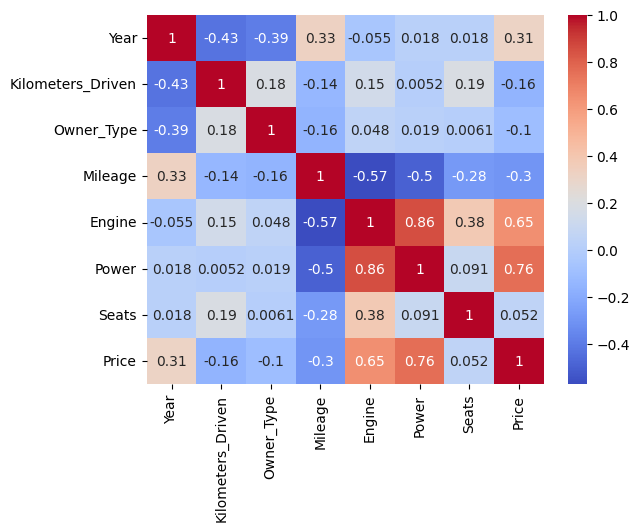

In [792]:
corr = X[['Year','Kilometers_Driven','Owner_Type','Mileage','Engine','Power','Seats','Price']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<h1>Training</h1>

In [793]:
Xmean=X_train.mean()
Xstd=X_train.std()
Ystd=Y_train.std().item()
Ymean=Y_train.mean().item()
X_train = normx(X_train)
Y_train = normy(Y_train)

In [794]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [795]:
W_train = np.ones((10,1))
B_train= 0.0

In [796]:
def compute_cost(Y,Yp):
    cost = (Y-Yp)**2/(2*Y.size)
    return cost.sum()

def z_calc(X,W,B):
    return np.matmul(X,W)+B

In [797]:
Z_train=z_calc(X_train,W_train,B_train)

In [798]:
print(X_train.shape)
print(Y_train.shape)
print(Z_train.shape)

(3750, 10)
(3750, 1)
(3750, 1)


In [799]:
W_history=[]
B_history=[]
Z_history=[]
J_history=[]
W_history.append(W_train)
B_history.append(B_train)
Z_history.append(Z_train)
J_history.append(compute_cost(Y_train,Z_train))

In [800]:
def gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train):
    for i in range(epoch):
        W_history.append(W_history[-1]-alpha/X_train.shape[0]*X_train.T@(Z_train-Y_train))
        B_history.append(B_history[-1]-alpha/X_train.shape[0]*np.sum((Z_train-Y_train)))
        Z_train = z_calc(X_train, W_history[-1], B_history[-1])
        Z_history.append(Z_train)
        J_history.append(compute_cost(Y_train,Z_train))
        if (i%10)==0:
            print("Iteration:",i, "Cost:", J_history[-1])

In [801]:
epoch=1000
alpha=.4
gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train)

Iteration: 0 Cost: 1.3756139549075284
Iteration: 10 Cost: 0.21741403060939576
Iteration: 20 Cost: 0.16378291080869384
Iteration: 30 Cost: 0.15802087647400326
Iteration: 40 Cost: 0.15707582889090346
Iteration: 50 Cost: 0.15681349725739194
Iteration: 60 Cost: 0.1567035761224263
Iteration: 70 Cost: 0.1566489924771738
Iteration: 80 Cost: 0.1566205469264109
Iteration: 90 Cost: 0.1566055431222528
Iteration: 100 Cost: 0.15659760621974694
Iteration: 110 Cost: 0.15659340473571787
Iteration: 120 Cost: 0.15659118026603408
Iteration: 130 Cost: 0.15659000247709265
Iteration: 140 Cost: 0.15658937886782742
Iteration: 150 Cost: 0.1565890486818499
Iteration: 160 Cost: 0.15658887385629083
Iteration: 170 Cost: 0.1565887812903367
Iteration: 180 Cost: 0.1565887322788755
Iteration: 190 Cost: 0.15658870632847743
Iteration: 200 Cost: 0.15658869258836153
Iteration: 210 Cost: 0.1565886853132983
Iteration: 220 Cost: 0.15658868146132615
Iteration: 230 Cost: 0.15658867942179885
Iteration: 240 Cost: 0.1565886783419

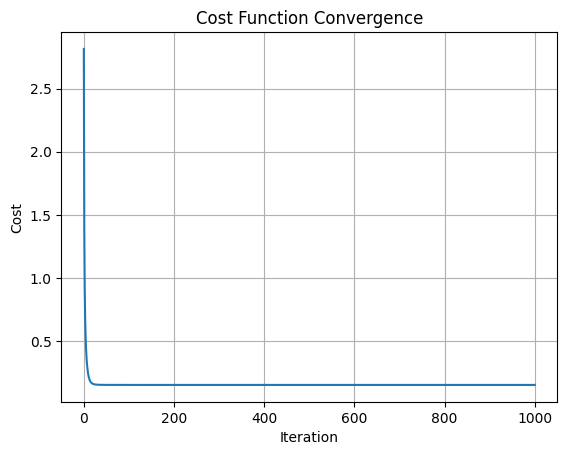

In [802]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

In [803]:
Y_train=Y_train*Ystd+Ymean
Z_train=Z_history[-1]
Z_train=Z_train*Ystd+Ymean

In [804]:
Z_train.min()

np.float64(-15.25269012231788)

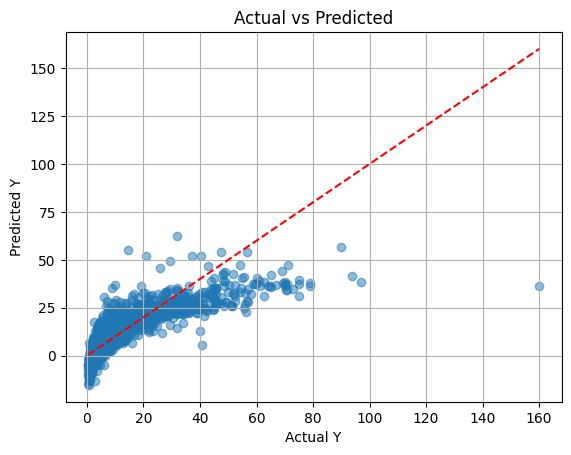

In [805]:
plt.scatter(Y_train, Z_train, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [806]:
ss_res = ((Y_train - Z_train) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_train - Y_train.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.6867391095090598


In [807]:
W=W_history[-1]
B=B_history[-1]

In [808]:
W.shape

(10, 1)

<h1>Testing Begins Here</h1>

In [809]:
X_test=pd.read_csv('Test.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_test=pd.read_csv('Test.csv', usecols=['Price'])

In [810]:
X_test=preprocessing(X_test)
X_test = normx(X_test)

In [811]:
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

In [812]:
Y_hat=X_test@W+B
Y_hat = Y_hat*Ystd+Ymean

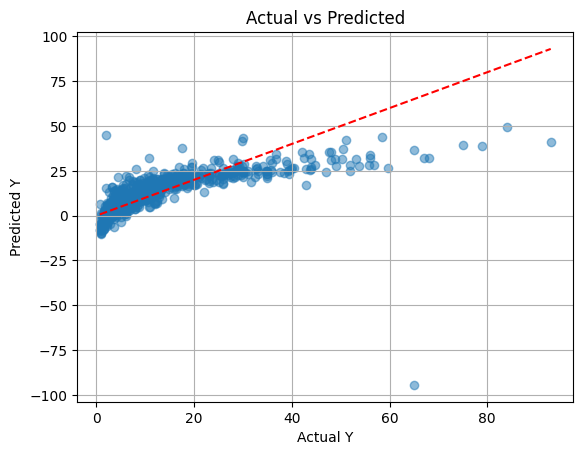

In [813]:
plt.scatter(Y_test, Y_hat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [814]:
ss_res = ((Y_test - Y_hat) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_test - Y_hat.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.5359170687614954
